# House Sales Analysis Project
### Data Analysis with Python

## House Sales in King County, USA


<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv">The dataset</a> contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


The column description of the dataset is given below:
 | Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


First, we will import the required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets


Load the csv:


In [2]:
file_name='kc_house_data.csv'
df=pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Finding the number of rows and columns in the dataframe.

In [4]:
df.shape

(21613, 22)

#### Checking the Data Types of columns


In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### We use the method describe to obtain a statistical summary of the dataframe.


In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling


Dropping the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 as they provide little value to the data analysis.

In [7]:
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Checking missing values in the data

In [8]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>.


In [10]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>.


In [11]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

rechecking the missing values

In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


Using the method <code>value_counts</code>, we count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.

In [13]:
x=df["floors"].value_counts().to_frame()
x

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Determining whether houses with a waterfront view or without a waterfront view have more price outliers, using a boxplot.


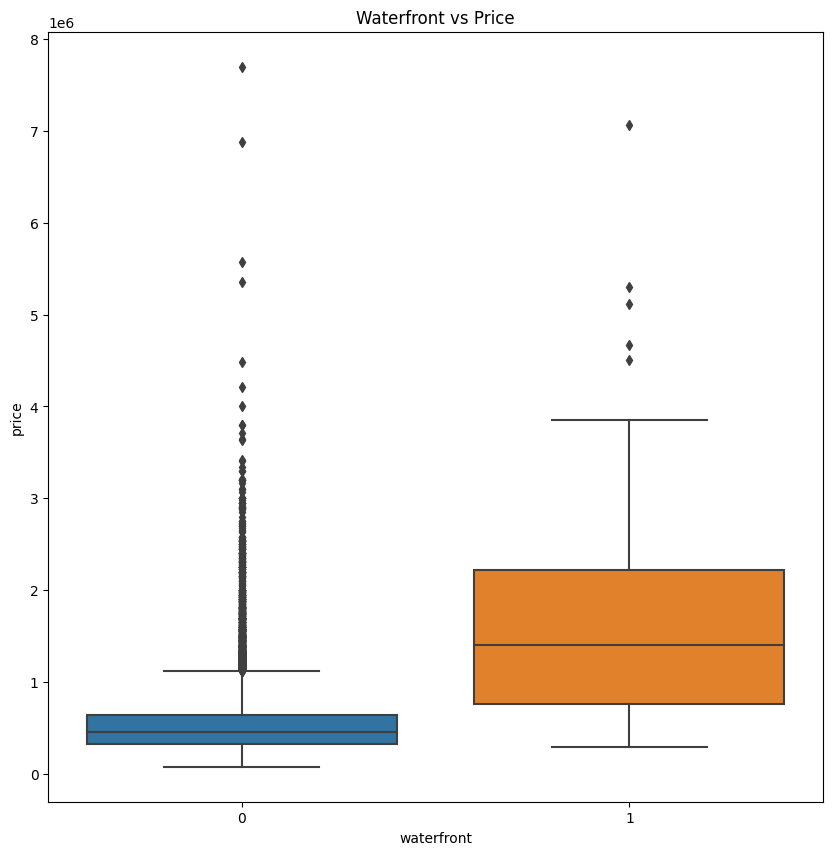

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x='waterfront', y='price', data=df).set_title('Waterfront vs Price')
plt.show()

Determining if the feature <code>sqft_above</code> is negatively or positively correlated with price.

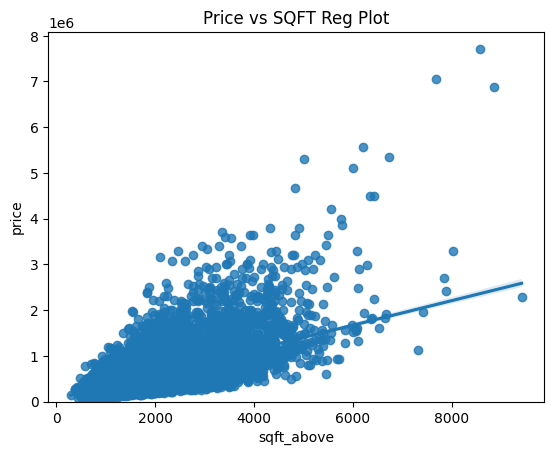

In [15]:
sns.regplot(x='sqft_above', y='price', data=df).set(title= 'Price vs SQFT Reg Plot')
plt.ylim(0,)
plt.show()

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [16]:
df.corr()['price'].sort_values()

C:\Users\priya\AppData\Local\Temp\ipykernel_16776\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

C:\Users\priya\AppData\Local\Temp\ipykernel_16776\586932635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu').set(title='Correlation Heatmap')


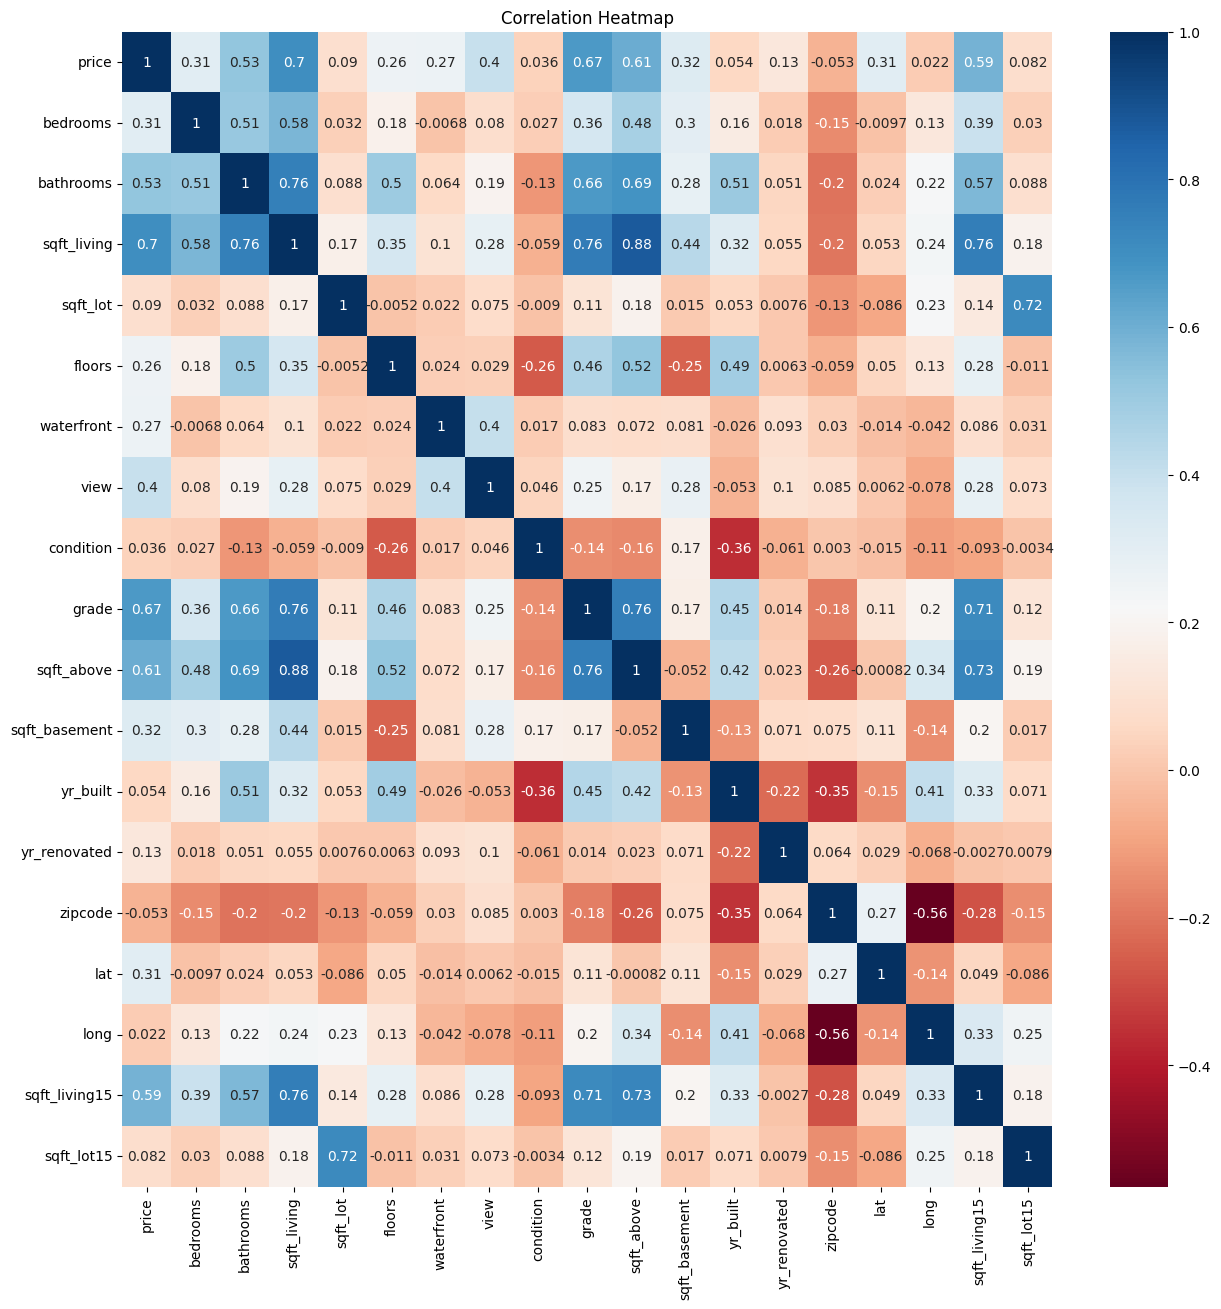

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='RdBu').set(title='Correlation Heatmap')
plt.show()


### `Observation: We can see that not many features are strongly correlated to the price, so modelling with these features may not be the best approach.`

In [18]:
# import plotly.express as px
# # df = px.data.iris()
# fig = px.scatter_matrix(df)
# fig.show()


In [19]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:

# # plt.rcParams["figure.figsize"] = (5,5)
# fig, axs = plt.subplots(9, 2, figsize=(10, 10), sharey=True)
# for i in range(2):
#     for j in range(2):
#         # plt.subplot(i,j, i*j)
#         # sns.regplot(x=df.columns[i*j], y='price', data=df)
#         col= df.loc[:,df.columns[i*j]].name
#         # axs[i][j]=sns.regplot(x=col, y='price', data=df)
#         # axs[i][j].scatter(df[col], df['price'])
# # plt.grid()
# # plt.show()
# # fig, axs = plt.subplots(3, 6, figsize=(10, 6), sharey=True)
# # # axs[0].bar(names, values)
# # # axs[1].scatter(names, values)
# # axs[1][1].plot(df['price'], df['price'])
# # axs
# fig.suptitle('Price vs Other Features')

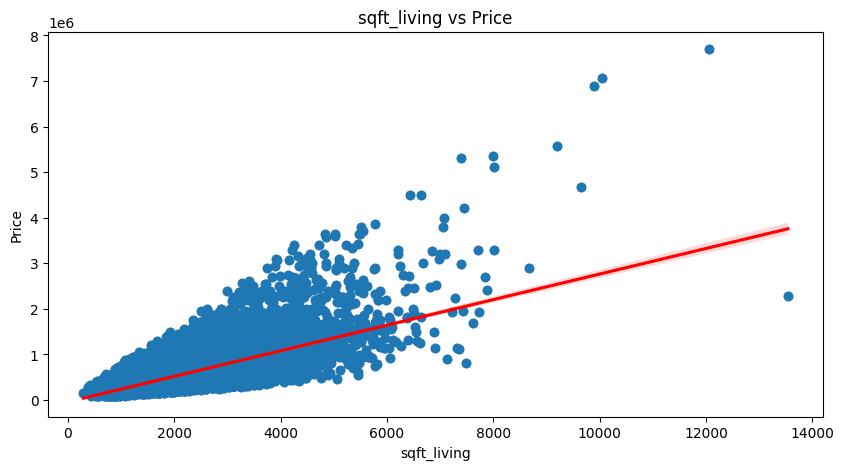

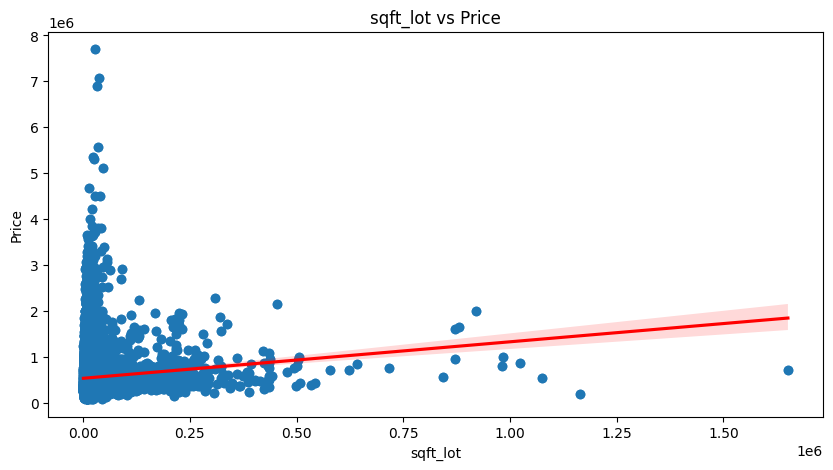

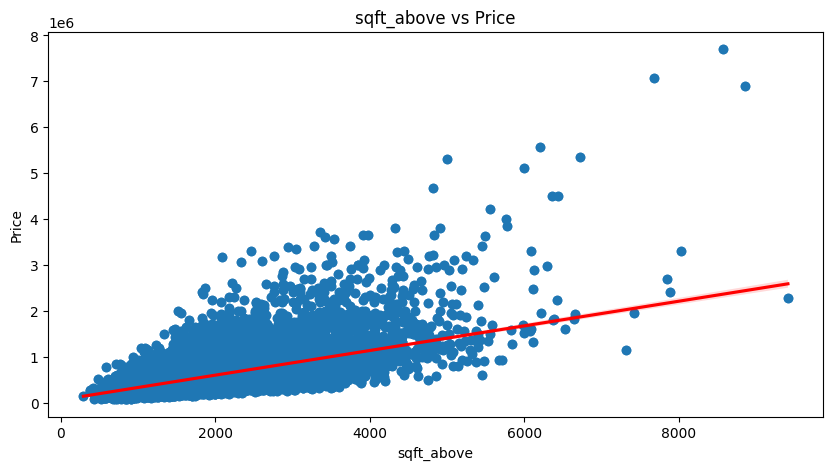

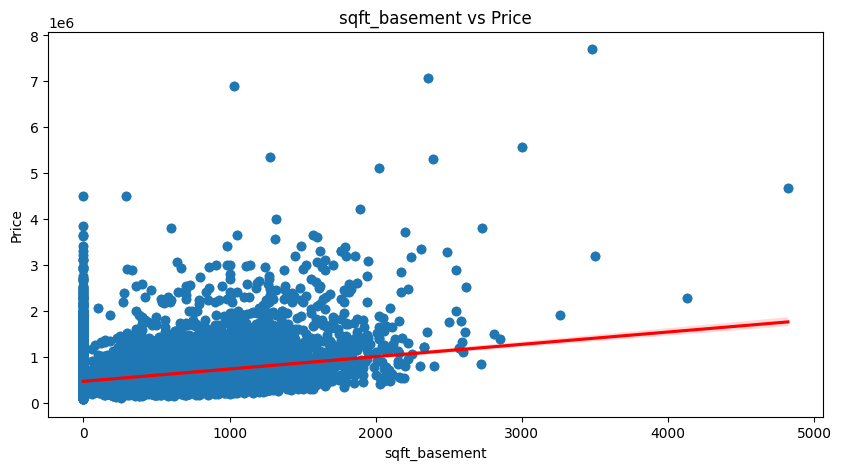

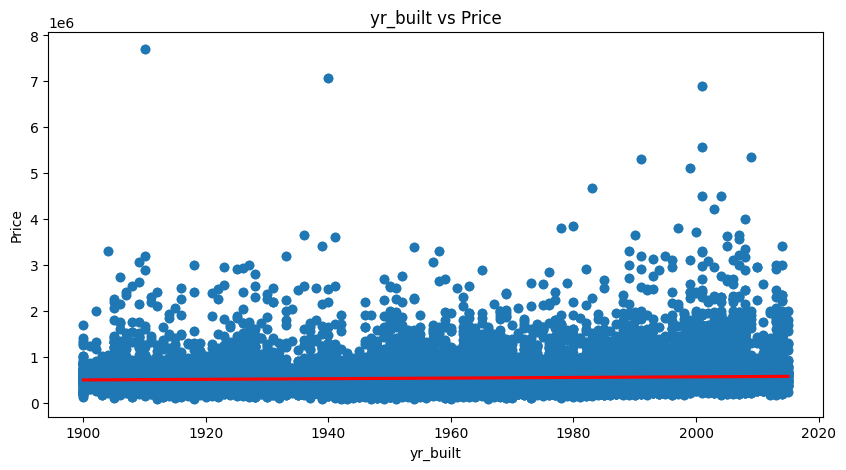

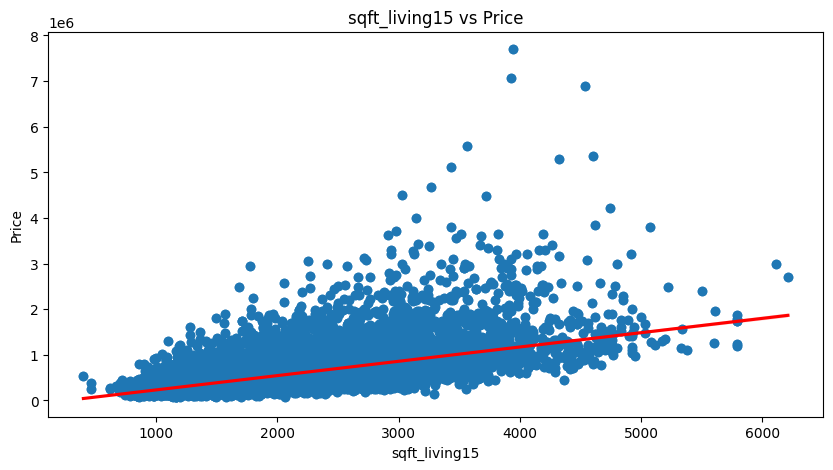

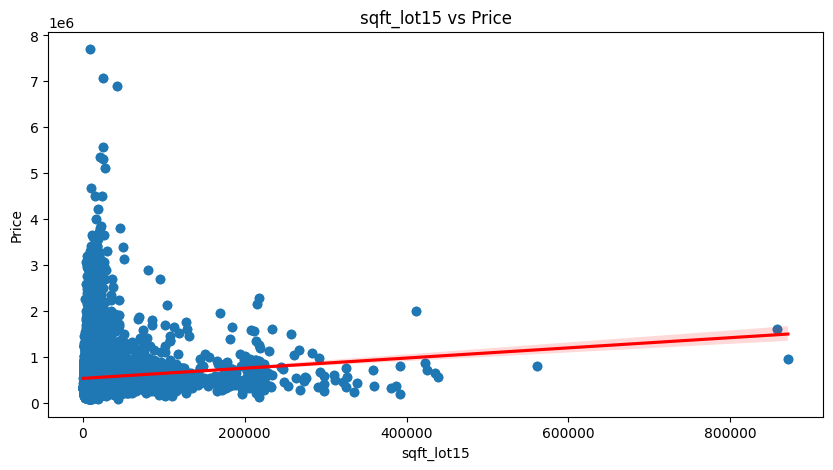

In [21]:
for i in df[['sqft_living', 'sqft_lot',
               'sqft_above',
             'sqft_basement', 'yr_built',
             'sqft_living15', 'sqft_lot15']].columns:
    plt.figure(figsize=(10,5))
    plt.scatter(df[i], df['price'])
    sns.regplot(x=i, y='price', data=df, line_kws={
                "color": "red"}).set(title=i+' vs Price')
    # plt.title(i+"vs Price")
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()
    # 'bedrooms', 'bathrooms', 'condition', 'grade', 'floors', 'waterfront', 'view', 'yr_renovated', 'zipcode', 'lat', 'long',


## Plotting boxplots for the categorical variables

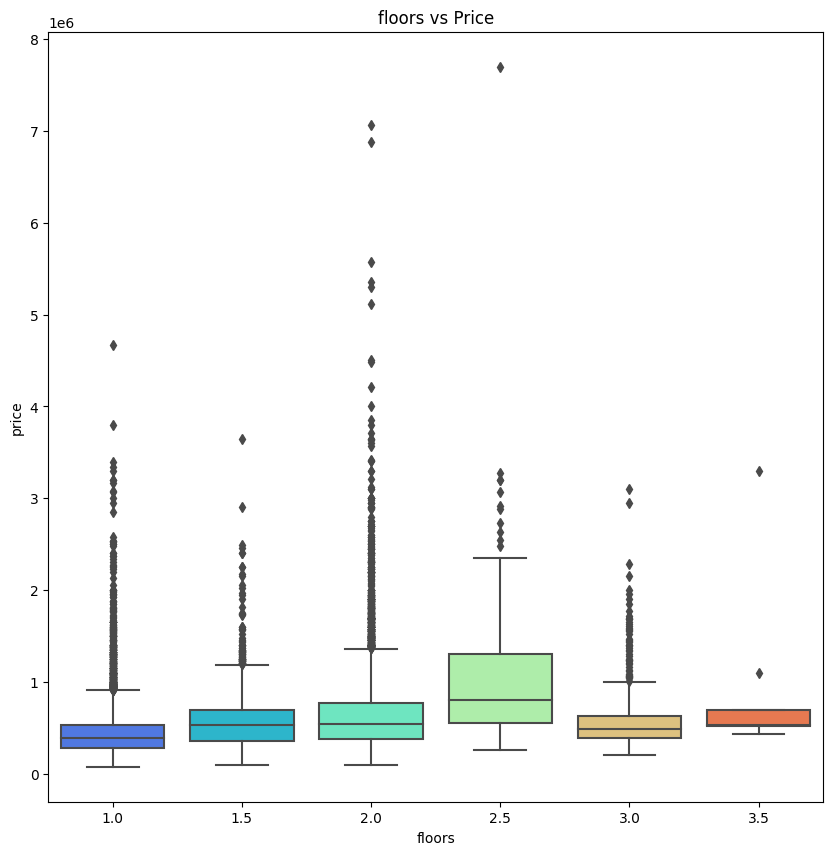

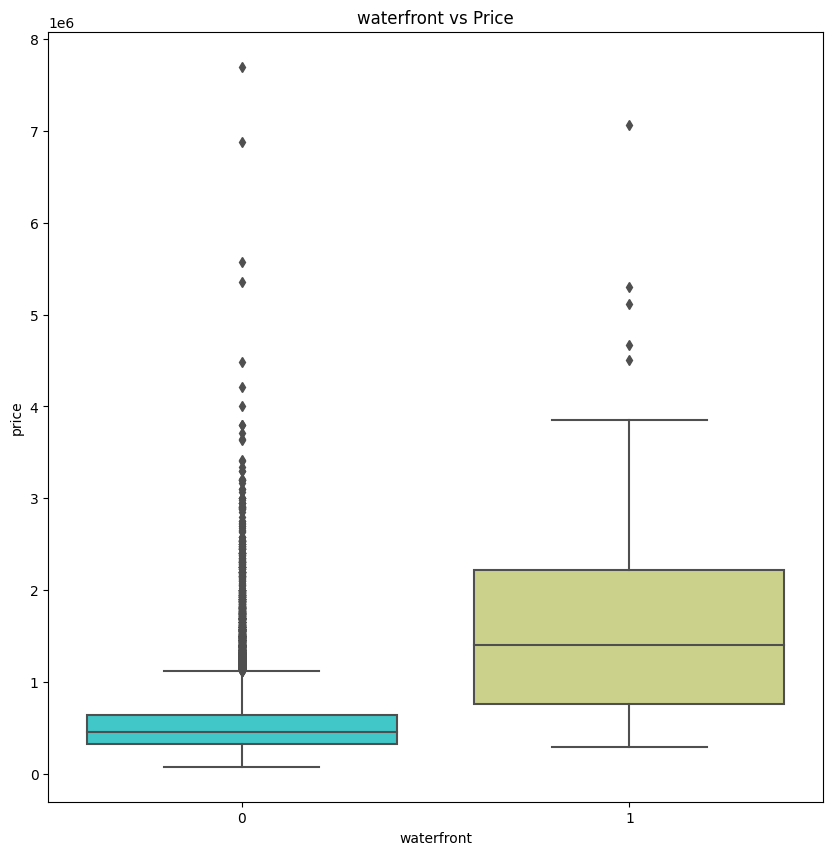

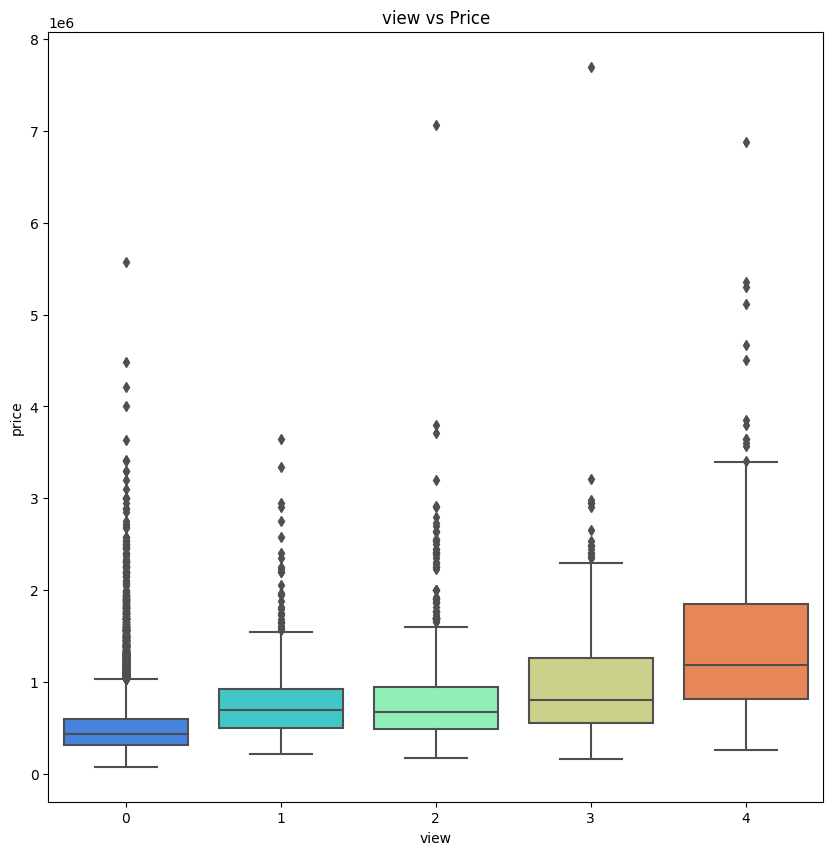

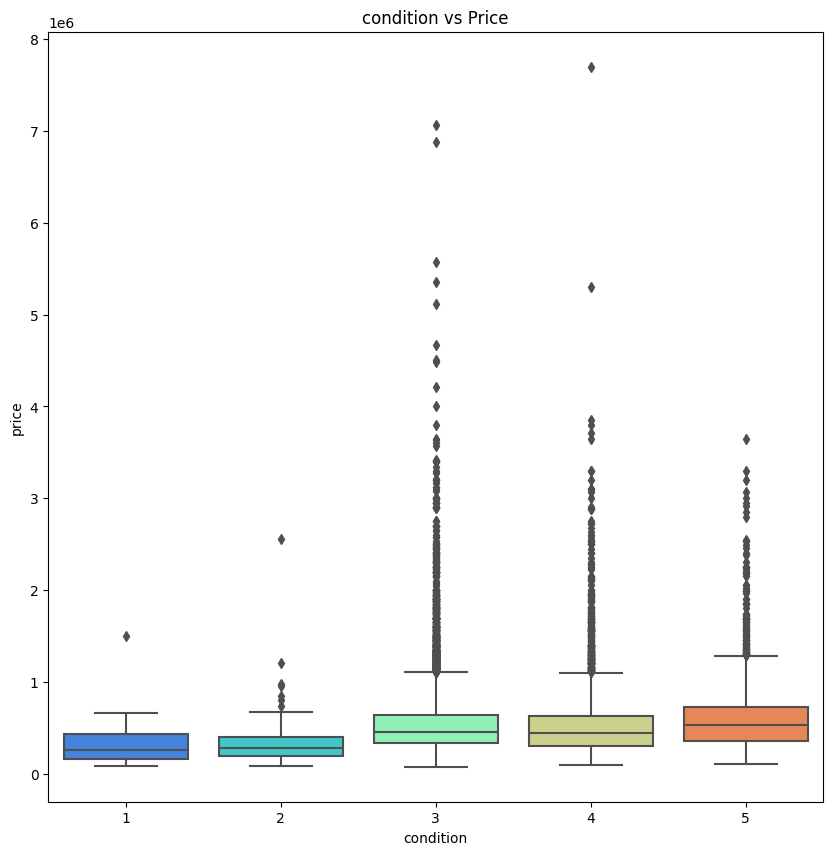

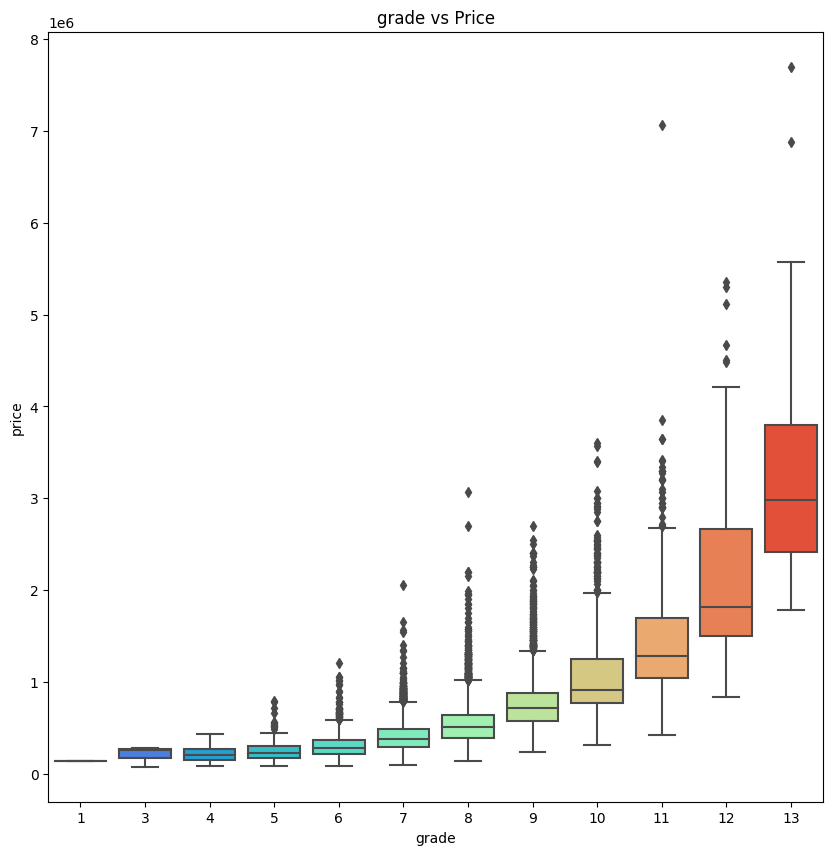

In [22]:
for i in df[['floors', 'waterfront', 'view', 'condition', 'grade']].columns:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=i, y='price', data=df,
                palette='rainbow').set_title(i+' vs Price')
    plt.show()


In [23]:
# import matplotlib


# matplotlib.pyplot.subplots(1,2)
# plt.subplot(1,1,1)
# sns.regplot(x='sqft_living', y='price', data=df)

# plt.subplot(1,2,2)
# sns.regplot(x='sqft_living15', y='price', data=df)

# plt.grid()

In [24]:
# fig, axs = plt.subplots(2, 3, figsize=(9, 3), sharey=True)
# # axs[0].bar(names, values)
# # axs[1].scatter(names, values)
# axs[1][1].plot(df['price'],df['price'])
# # axs

# Model Development

Inspite of the features not being strongly correlated to the price, we will use the following features to build our model:


In [25]:
#TO ADD: TEST TRAIN SPLIT

In [26]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.


In [27]:
lm.fit(df[['sqft_living']], df['price'])
lm.score(df[['sqft_living']], df['price'])

0.4928532179037931

We can see that the score is not very good, so we will try to fit a multiple linear regression model to the data instead.

Fitting a linear regression model to predict the <code>'price'</code> using the list of features:


In [28]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]


calculating the R^2 score.


In [29]:
lm.fit(df[features], Y)
lm.score(df[features], Y)

0.6576372970735713

The accuracy increased but not by much, so we will try to fit a polynomial regression model to the data instead.

### USING PIPELINE 
We create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [30]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Using the list, we create a pipeline object to predict the 'price',then fit the object using the features in the list <code>features</code>, and then calculate the R^2.


In [31]:
pipe = Pipeline(Input)
Z=df[features]
y=df['price']
pipe.fit(Z,y)
pipe.score(Z,y)


0.7508598253545078

We again see that the accuracy is still not very good. So we will try to use Ridge regression to see if we can improve the accuracy.

# Model Evaluation and Refinement


Importing the necessary modules:


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

We will split the data into training and testing sets:


In [33]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
#displaying the shape of the training and testing data
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Creating and fitting a Ridge regression object using the training data, with the regularization parameter to 0.1, and then calculatong the R^2 using the test data.


In [34]:
from sklearn.linear_model import Ridge

In [35]:
RR= Ridge(alpha=100)
RR.fit(x_train, y_train)
RR.score(x_test, y_test)


0.6388711086683928

Performing a second order polynomial transform on both the training data and testing data. 
Then we create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.


In [36]:
pr= PolynomialFeatures(degree=2)
x_train_pr= pr.fit_transform(x_train)
x_test_pr= pr.fit_transform(x_test)
rm1= Ridge(alpha=0.1)
rm1.fit(x_train_pr, y_train)
rm1.score(x_test_pr, y_test)

0.700274426566343

We can see that the model is not improving. The max accuracy we got was 70% using the polynomial regression model.

We can later apply advanced models to see if we can improve the accuracy.